# Iris Report Example
The iris dataset is one of the most well known datasets in statistics and data science.
This example notebook shows how we can put together a simple data analysis report in esparto.


Specifically we will look at
* Text content with markdown formatting
* Including images from files
* Converting a Pandas DataFrame to a table
* Adding plots from Matplotlib and Seaborn

In [1]:
# Environment setup
import os
!pip install -Uqq esparto
if os.environ.get("BINDER_SERVICE_HOST"):
    !pip install -Uqq pandas matplotlib seaborn

In [2]:
import esparto as es
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Before we start let's instantiate a Page object; we're not going to use this immediately but we'll need it later!

In [3]:
my_page = es.Page(title="Iris Report")

## Text with Markdown Formatting
The text for this report has been taken from [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set).
Note that the text contains markdown formatting that will be converted to HTML when it is rendered.

In [4]:
intro = """
The **Iris flower** data set, or Fisher's Iris data set, is a multivariate data set introduced by 
the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper 
'The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis'. 
It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify 
the morphologic variation of Iris flowers of three related species. Two of the three species were 
collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at 
the same time by the same person with the same apparatus".


The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and 
Iris versicolor). Four features were measured from each sample: the length and the width of the sepals 
and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear 
discriminant model to distinguish the species from each other.
"""
                    

content_credit = """
_Retrieved from [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set) on 2021-04-05_  
_License: [CC-BY-SA-3.0](https://en.wikipedia.org/wiki/Wikipedia:Text_of_Creative_Commons_Attribution-ShareAlike_3.0_Unported_License)_  


_Photo of Iris Virginica by Eric Hunt_  
_License: [CC-BY-SA-4.0](https://commons.wikimedia.org/wiki/Category:CC-BY-SA-4.0)_
"""

In this example we wrap the markdown text in a Markdown object, although this could have been inferred if we added it directly to any Layout object.

In [5]:
intro_md = es.Markdown(intro)
intro_md

<IPython.core.display.Javascript object>

In [6]:
credits_md = es.Markdown(content_credit)
credits_md

<IPython.core.display.Javascript object>

## Images
To add an image to the report, we give the image filepath to an Image object. 
A caption and alternative text can also be provided.


Since the original image is rather large we scale it down to 60% of its original size.

In [7]:
!wget -q https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Iris_virginica_2.jpg/480px-Iris_virginica_2.jpg \
-O iris-virginica.jpg


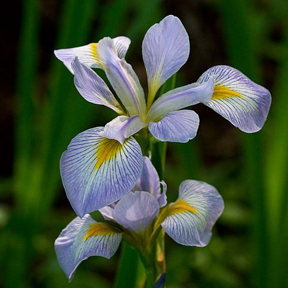

<IPython.core.display.Javascript object>

In [8]:
pic = "./iris-virginica.jpg"
iris_img = es.Image(pic, caption="Iris Virginica", alt_text=pic).rescale(0.6)
iris_img

Now that we have some content ready for our introduction section, we can define the structure and check that it renders nicely.


Notice that the first row contains our intro text and iris virginica picture. The licenses and attribution have been added to a second row beneath these.


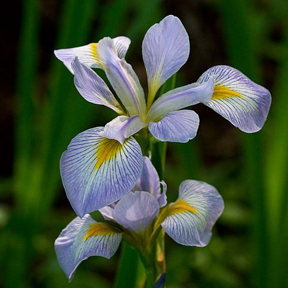

<IPython.core.display.Javascript object>

<class 'esparto._layout.Section'>: Introduction

In [9]:
intro_section = es.Section(
    es.Row(intro_md, iris_img),
    es.Row(credits_md),
    title="Introduction"
)

intro_section

Adding a title helps identify the item when looking at the document structure.

In [10]:
print(intro_section)

{'Introduction': [{'Row': [{'Column': ['Markdown']}, {'Column': ['Image']}]},
                  {'Row': [{'Column': ['Markdown']}]}]}


## Pandas DataFrames
For the analysis section we will include a table of sample data from a Pandas DataFrame and a couple of visualisations 
produced in MatplotLib and Seaborn.


To start, we define a new Section object.

In [11]:
analysis_section = es.Section(title="Data Analysis")

The data set is downloaded from GitHub and read in with the usual Pandas API.

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
sample_df = df.sample(10, random_state=1)
sample_df

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
98,5.1,2.5,3.0,1.1,versicolor
75,6.6,3.0,4.4,1.4,versicolor
16,5.4,3.9,1.3,0.4,setosa
131,7.9,3.8,6.4,2.0,virginica
56,6.3,3.3,4.7,1.6,versicolor
141,6.9,3.1,5.1,2.3,virginica
44,5.1,3.8,1.9,0.4,setosa
29,4.7,3.2,1.6,0.2,setosa
120,6.9,3.2,5.7,2.3,virginica


To include this in our page, we wrap the DataFrame in the DataFramePd class.

In [13]:
sample_tbl = es.DataFramePd(sample_df)
sample_tbl

sepal_length,sepal_width,petal_length,petal_width,species
5.8,4.0,1.2,0.2,setosa
5.1,2.5,3.0,1.1,versicolor
6.6,3.0,4.4,1.4,versicolor
5.4,3.9,1.3,0.4,setosa
7.9,3.8,6.4,2.0,virginica
6.3,3.3,4.7,1.6,versicolor
6.9,3.1,5.1,2.3,virginica
5.1,3.8,1.9,0.4,setosa
4.7,3.2,1.6,0.2,setosa
6.9,3.2,5.7,2.3,virginica


<IPython.core.display.Javascript object>

We have not given any information as to how this table should sit in the Section, so let's see how esparto deals with it.

In [14]:
analysis_section += sample_tbl

Notice that the DataFramePd content has been automatically wrapped in a Column and a Row.

In [15]:
print(analysis_section)

{'Data Analysis': [{'Row': [{'Column': ['DataFramePd']}]}]}


If we decide to give a title to this Row we can do so by directly accessing its title attribute.

In [16]:
analysis_section.children[0].title = "Sample Data"
analysis_section

sepal_length,sepal_width,petal_length,petal_width,species
5.8,4.0,1.2,0.2,setosa
5.1,2.5,3.0,1.1,versicolor
6.6,3.0,4.4,1.4,versicolor
5.4,3.9,1.3,0.4,setosa
7.9,3.8,6.4,2.0,virginica
6.3,3.3,4.7,1.6,versicolor
6.9,3.1,5.1,2.3,virginica
5.1,3.8,1.9,0.4,setosa
4.7,3.2,1.6,0.2,setosa
6.9,3.2,5.7,2.3,virginica


<IPython.core.display.Javascript object>

<class 'esparto._layout.Section'>: Data Analysis

## Plotting with Matplotlib and Seaborn
The FigureMpl class will convert any Matplotlib figure to an image for inclusion in the document. 

In [17]:
sns.set_palette("colorblind")
sns.set_style("white")

In [18]:
df.species = df.species.astype("category")

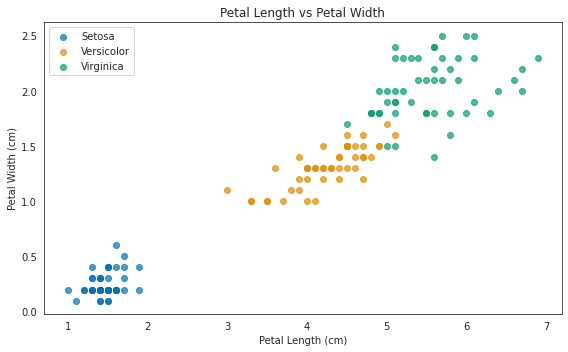

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))

for i, s in enumerate(df.species.cat.categories):
    plot_data = df.loc[df.species == s]
    ax.scatter(plot_data.petal_length, plot_data.petal_width, alpha=0.7, c=f"C{i}", label=s.capitalize())

ax.set_title("Petal Length vs Petal Width")
ax.set_xlabel("Petal Length (cm)")
ax.set_ylabel("Petal Width (cm)")
ax.legend()
fig.tight_layout();

We can easily wrap this figure in a FigureMpl class.


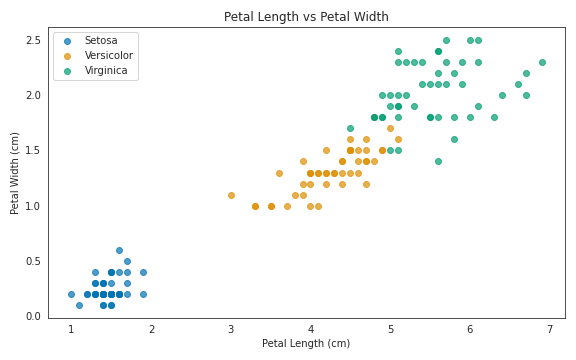

<IPython.core.display.Javascript object>

In [20]:
scatter_fig = es.FigureMpl(fig)
scatter_fig

For some plots we may need to get the figure by using plt.gcf() (get current figure), as shown below.

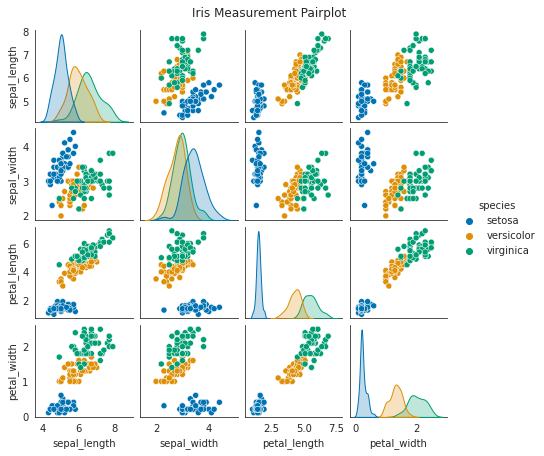

In [21]:
sns.pairplot(df, hue="species", height=1.6)
fig = plt.gcf()
fig.subplots_adjust(top=0.93)
fig.suptitle("Iris Measurement Pairplot")
pairplot_fig = es.FigureMpl(fig)

Finally, we add these plots in their own row at the end of the data analysis section.

sepal_length,sepal_width,petal_length,petal_width,species
5.8,4.0,1.2,0.2,setosa
5.1,2.5,3.0,1.1,versicolor
6.6,3.0,4.4,1.4,versicolor
5.4,3.9,1.3,0.4,setosa
7.9,3.8,6.4,2.0,virginica
6.3,3.3,4.7,1.6,versicolor
6.9,3.1,5.1,2.3,virginica
5.1,3.8,1.9,0.4,setosa
4.7,3.2,1.6,0.2,setosa
6.9,3.2,5.7,2.3,virginica

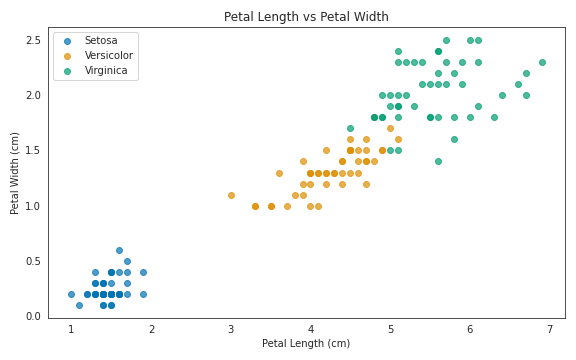
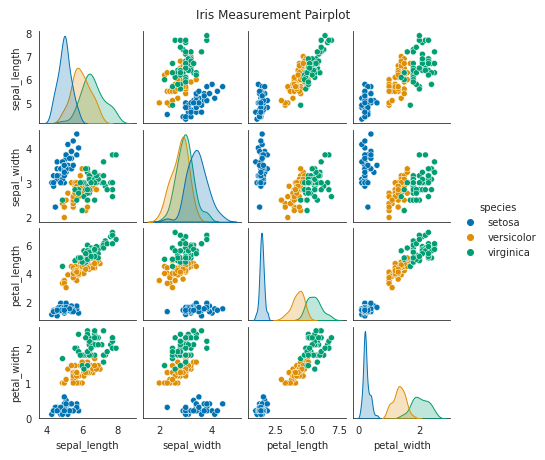

<IPython.core.display.Javascript object>

<class 'esparto._layout.Section'>: Data Analysis

In [22]:
analysis_section += es.Row(scatter_fig, pairplot_fig, title="Visualisation")
analysis_section

## Setting up the Page
We're going to return now to the Page object we made at the start of the notebook.


Adding sections is as simple as using the '+=' operator to add them in place.

First, let's check the initial page structure. It's currently empty.

In [23]:
print(my_page)

{'Iris Report': []}


After adding the introductory section we can see that new content is present. 

In [24]:
my_page += intro_section
print(my_page)

{'Iris Report': [{'Introduction': [{'Row': [{'Column': ['Markdown']},
                                            {'Column': ['Image']}]},
                                   {'Row': [{'Column': ['Markdown']}]}]}]}


And again with the analysis section.

In [25]:
my_page += analysis_section
print(my_page)

{'Iris Report': [{'Introduction': [{'Row': [{'Column': ['Markdown']},
                                            {'Column': ['Image']}]},
                                   {'Row': [{'Column': ['Markdown']}]}]},
                 {'Data Analysis': [{'Sample Data': [{'Column': ['DataFramePd']}]},
                                    {'Visualisation': [{'Column': ['FigureMpl']},
                                                       {'Column': ['FigureMpl']}]}]}]}


We can view the final page rendering within the notebook.

sepal_length,sepal_width,petal_length,petal_width,species
5.8,4.0,1.2,0.2,setosa
5.1,2.5,3.0,1.1,versicolor
6.6,3.0,4.4,1.4,versicolor
5.4,3.9,1.3,0.4,setosa
7.9,3.8,6.4,2.0,virginica
6.3,3.3,4.7,1.6,versicolor
6.9,3.1,5.1,2.3,virginica
5.1,3.8,1.9,0.4,setosa
4.7,3.2,1.6,0.2,setosa
6.9,3.2,5.7,2.3,virginica

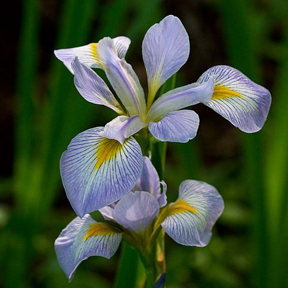
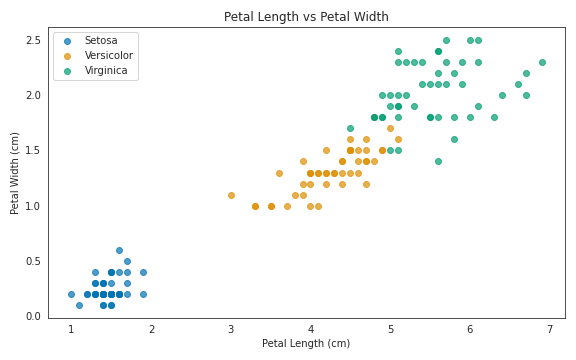
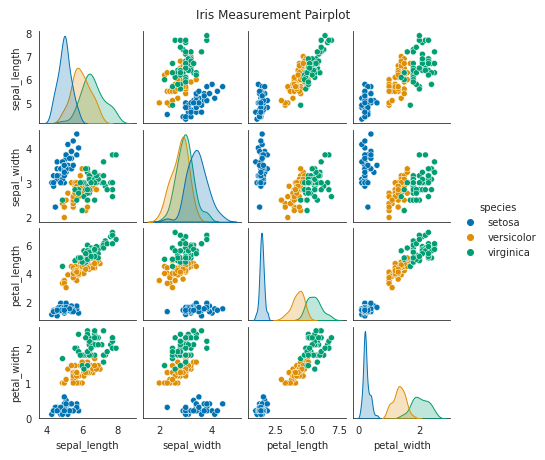

<IPython.core.display.Javascript object>

<class 'esparto._layout.Page'>: Iris Report

In [26]:
my_page

We can now save our page to an HTML file and share it.

In [27]:
page_name = "iris-report.html"
my_page.save(page_name)

Check your current working directory for the finished report!